<a href="https://colab.research.google.com/github/melianti/project/blob/main/Online_store_ABTesting_Sprint8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Online store Hypothesis & A/B Testing

## Overview
Data analyst in big online store was asked together with marketing team to do some works using data to improve company income.

The assignment including:
1. Prioritize hypothesis in the list base on framework ICE and framework RICE , then analyze the result.
2. A/B Testing preparation & analysis on some topics below:

*   Cummulative income
*   Average cummulative income
*   Cummulative conversion
*   Order size
*   Order value
*   A/B testing Using Raw data
*   A/B testing Using Filtered data
3. Business decision:
*   Stop Testing consider one of the group become leader
*   Stop Testing and conclude there is no difference between group
. Continue the testing













In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1='/content/drive/MyDrive/Dataset/sprint8/hypotheses_us.csv'
path2='/content/drive/MyDrive/Dataset/sprint8/orders_us.csv'
path3='/content/drive/MyDrive/Dataset/sprint8/visits_us.csv'


## Initialization

In [4]:

# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy import stats, optimize, interpolate
import dataclasses
#import hypothesis
#from hypothesis import strategies


In [5]:
# Loading data into dataframe
df_hypotheses = pd.read_csv(path1, sep=';')

df_orders = pd.read_csv(path2)
df_visits = pd.read_csv(path3)

## Data Preparation

In [6]:
#data hypotheses
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [8]:
# check data with null value
df_hypotheses.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [9]:
# data orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
#data orders check null value
df_orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
#change data type in df_orders
df_orders['visitorId'] = df_orders['visitorId'].astype(str)
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 46.9+ KB


In [12]:
df_orders.duplicated().sum()

0

In [13]:
# check if there is visitor join both group A and Group B
duplicateorders = df_orders[df_orders['visitorId'].duplicated()]
print(duplicateorders.sort_values('visitorId'))

      transactionId   visitorId       date  revenue group
674      1748608673  1230306981 2019-08-09    100.5     B
675      2658936877  1230306981 2019-08-09    100.1     B
676       278311817  1230306981 2019-08-09     30.0     A
739      2541955961  1230306981 2019-08-09    160.0     A
677      2348589867  1294878855 2019-08-09    425.4     A
...             ...         ...        ...      ...   ...
395      2552819381   678354126 2019-08-28     15.5     A
1137     2183069967   759473111 2019-08-13    810.4     A
1163     2357685128   818047933 2019-08-14     10.2     B
703      4293855558     8300375 2019-08-07     30.5     A
1183     1458356232   963407295 2019-08-14     80.0     A

[166 rows x 5 columns]


In [14]:
wronggroup = duplicateorders.drop_duplicates(
  subset = ['visitorId', 'group'],
  keep = 'last').reset_index(drop = True)
print(wronggroup.sort_values('visitorId'))

     transactionId   visitorId       date  revenue group
45      2541955961  1230306981 2019-08-09    160.0     A
38      2658936877  1230306981 2019-08-09    100.1     B
72      4262851755  1294878855 2019-08-31     10.8     A
59      3922986948  1316129916 2019-08-27     15.8     B
40       511953429  1333886533 2019-08-29     50.4     B
..             ...         ...        ...      ...   ...
14      2552819381   678354126 2019-08-28     15.5     A
94      2183069967   759473111 2019-08-13    810.4     A
97      2357685128   818047933 2019-08-14     10.2     B
42      4293855558     8300375 2019-08-07     30.5     A
105     1458356232   963407295 2019-08-14     80.0     A

[109 rows x 5 columns]


In [15]:
wronggroup2 = wronggroup[wronggroup['visitorId'].duplicated()]
#print(wronggroup2.sort_values('visitorId'))
wronggroup2

,transactionId,visitorId,date,revenue,group
35,332633624,3891541246,2019-08-04,80.2,A
36,1666104258,2038680547,2019-08-29,40.2,B
45,2541955961,1230306981,2019-08-09,160.0,A
56,847315305,2780786433,2019-08-27,10.3,B
67,2419539947,2587333274,2019-08-08,60.4,B
76,1661772358,2378935119,2019-08-10,45.6,B
80,1814628689,1404934699,2019-08-11,135.9,A
82,1817215137,2458001652,2019-08-11,130.4,A
85,3571123442,457167155,2019-08-12,20.7,B
86,750632879,4256040402,2019-08-12,5.8,A


In [16]:
# visitorid dengan duplicate group
duplicategroup = ('3891541246', '2038680547', '1230306981', '2780786433', '2587333274', '2378935119','1404934699', '2458001652', '457167155', '4256040402', '3062433592', '199603092', '4186807279', '3717692402', '1668030113')
wronggroup4 = df_orders[df_orders['visitorId'].isin(duplicategroup)]
print(wronggroup4.sort_values('visitorId'))


      transactionId   visitorId       date  revenue group
739      2541955961  1230306981 2019-08-09    160.0     A
676       278311817  1230306981 2019-08-09     30.0     A
675      2658936877  1230306981 2019-08-09    100.1     B
674      1748608673  1230306981 2019-08-09    100.5     B
672      3667885894  1230306981 2019-08-09    105.7     A
...             ...         ...        ...      ...   ...
187      2048878902  4256040402 2019-08-17     25.8     A
1074     3571123442   457167155 2019-08-12     20.7     B
95        372616894   457167155 2019-08-22     20.2     B
256      2370268995   457167155 2019-08-23     25.9     A
94        252633006   457167155 2019-08-22     95.8     B

[82 rows x 5 columns]


In [17]:
wronggroup4['visitorId'].value_counts()
#15 visitors have two different group

visitorId
4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
3062433592     5
3717692402     5
1230306981     5
457167155      4
2587333274     4
3891541246     3
2780786433     3
1668030113     3
1404934699     3
4186807279     3
Name: count, dtype: int64

In [18]:
visitor = df_orders[df_orders['visitorId'] == '2458001652']
visitor

,transactionId,visitorId,date,revenue,group
133,3060563671,2458001652,2019-08-22,80.8,A
380,1177690313,2458001652,2019-08-25,40.7,B
454,3755354294,2458001652,2019-08-06,115.1,B
456,543654048,2458001652,2019-08-06,25.9,A
483,2280027650,2458001652,2019-08-06,105.8,B
611,1244084011,2458001652,2019-08-04,10.2,A
692,3586870909,2458001652,2019-08-09,85.4,B
727,3959083601,2458001652,2019-08-07,270.4,A
883,2412219836,2458001652,2019-08-05,40.2,B
916,527333943,2458001652,2019-08-08,85.4,B


In [19]:
# change visitor group of visitor which have duplicate group to group which have greater number
df_orders.loc[df_orders["visitorId"] == "4256040402", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "2458001652", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "2378935119", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "2038680547", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "3062433592", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "199603092", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "3717692402", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "1230306981", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "2587333274", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "457167155", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "2780786433", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "3891541246", 'group'] = 'A'
df_orders.loc[df_orders['visitorId'] == "1668030113", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "4186807279", 'group'] = 'B'
df_orders.loc[df_orders['visitorId'] == "1404934699", 'group'] = 'B'

In [20]:
df_orders.sample(8)

,transactionId,visitorId,date,revenue,group
745,648682471,2633052872,2019-08-27,80.4,A
362,1552043751,109615108,2019-08-06,35.7,A
905,2120503539,3239199975,2019-08-27,10.8,B
80,2513016443,1110543778,2019-08-16,35.0,A
536,3925488023,3984495233,2019-08-04,315.1,A
761,1109375840,2924874435,2019-08-07,20.2,A
941,2497497433,1830803815,2019-08-08,15.3,B
720,3901964025,296565978,2019-08-05,10.0,A


In [21]:
# memeriksa data visits
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
# chnage data type to 'date'
df_visits['date'] = pd.to_datetime(df_visits['date'])
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [23]:
# check for null value
df_visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [24]:
df_visits.duplicated().sum()

0

In [25]:
df_visits.tail(10)

,date,group,visits
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


### Note from Data Preparation
There are 3 datasets:
1. hypotheses 9 rows
2. orders 1197 rows
3. visits 62 rows

There are few changes made to data type
df_orders : column visitorId from int to object(string) and date to datetime
df_visits : column date to datetime

not found any missing value from the three datasets

It is found issue when one visitor can have two different groups. The issue founf in 15 visitors in df_orders.
Data correction was done with changing the group follow the largest group for that visitor.


## Hypothesis priority based on ICE & RICE Framework

In [26]:
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [27]:
# prioritize hyphotesis based on ICE principles
df_hypotheses['ICE'] = df_hypotheses['Impact'] * df_hypotheses['Confidence'] / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [28]:
#R Prioritize Hyphotesis based on RICE principles
df_hypotheses['RICE'] = df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence'] / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


#### Note for Prioritize Hyphotesis
TOP 5 hypothesis for improve income either using "ICE" or "RICE" framework are the same, although the sequence different as the impact of "reach" factor from framework RICE.

Priority based on framework "RICE"

1.   "Add subscription form to all main pages" : Reach factor 10
2.   "Add Product recommendation block to the store" : Reach factor = 8
3.   "Add two new channels for attracting traffic" : Impact & Confidence = 9, Reach = 1

Priority based on framework "ICE"

1.   "Launch promotion that give user discounts" : impact & Confidence = 9, Reach = 1



## A/B Testing Preparation & analysis

### Cummulative income by group

In [29]:
# array with group pair date and group
datesGroups = df_orders[['date', 'group']].drop_duplicates()

In [30]:
# Order aggregated
ordersAggregated = datesGroups.apply(
 lambda x: df_orders[
 np.logical_and(
 df_orders['date'] <= x['date'], df_orders['group'] == x['group']
 )
 ].agg(
 {
 'date': 'max',
 'group': 'max',
 'transactionId': pd.Series.nunique,
 'visitorId': pd.Series.nunique,
 'revenue': 'sum',
 }
 ),
 axis=1,
).sort_values(by=['date', 'group'])


# Visitor aggregated
visitorsAggregated = datesGroups.apply(
 lambda x: df_visits[
 np.logical_and(
 df_visits['date'] <= x['date'], df_visits['group'] == x['group']
 )
 ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
 axis=1,
).sort_values(by=['date', 'group'])



In [31]:
# Merge daily order aggregated and visitor aggregated
cumulativeData = ordersAggregated.merge(
 visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
 'date',
 'group',
 'orders',
 'buyers',
 'revenue',
 'visitors',
]


In [32]:
# Cummulative order and cumulative income base on group
#
# base on day, Group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#
# base on day, Group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


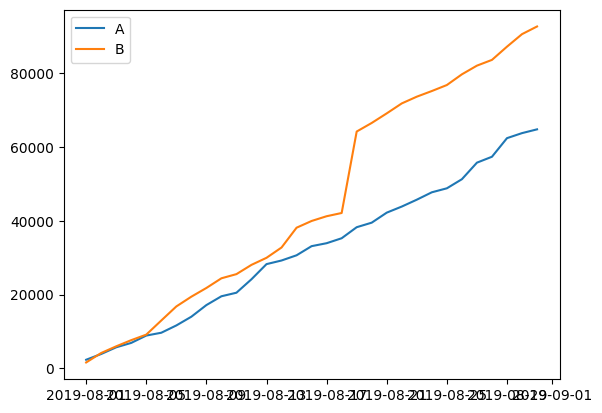

In [33]:
# Line Graph for group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Line Graph for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

#### Note Cummulative Income by group
Income continues to increase during testing period(2019/08/01) until (2019/08/31).
There is surge income at certain point, this indicate there is order surge or order with high value in sample data.

During testing period, income for group A and group B almost same, later income for group B increase and pass group A further more.


### Average Cummulative orders by group


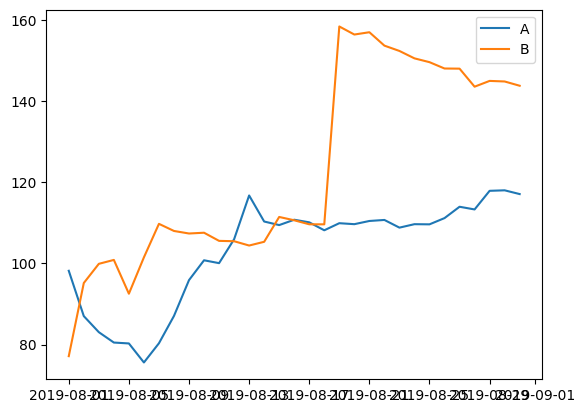

In [34]:
plt.plot(cumulativeRevenueA['date'],
cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],
cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()


#### Note Average cummulative orders

Average order for Group A went down at the beginning of testing period but moving up after 3 months and keep up until nd of testing period.

While average order for Group B at the beginning of testing period below average order of group A. But moving up until end of testing period. There was a significant surge at the middle of the testing period.


### Cummulative Conversion

In [35]:
# calculating cummulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# Group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# Group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

print(cumulativeDataB.head(10))


         date group  orders  buyers  revenue  visitors  conversion
1  2019-08-01     B      21      20   1620.0       713    0.029453
3  2019-08-02     B      44      42   4188.1      1294    0.034003
5  2019-08-03     B      60      58   5994.9      1803    0.033278
7  2019-08-04     B      76      73   7666.9      2573    0.029538
9  2019-08-05     B      99      95   9161.9      3280    0.030183
11 2019-08-06     B     128     120  12994.2      3935    0.032529
13 2019-08-07     B     153     143  16796.1      4644    0.032946
15 2019-08-08     B     180     167  19443.6      5298    0.033975
17 2019-08-09     B     203     188  21801.1      5908    0.034360
19 2019-08-10     B     227     210  24422.2      6277    0.036164


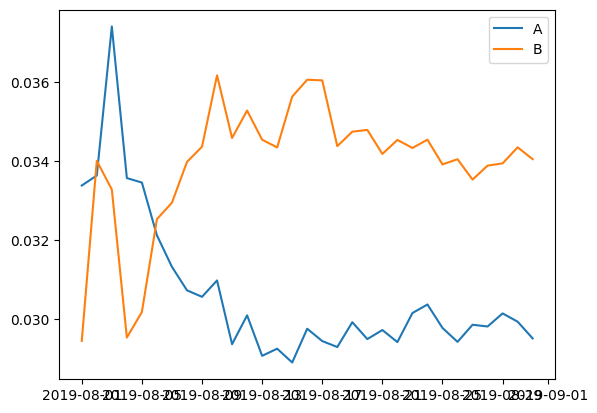

In [36]:
# Line graph
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# mengatur skala sumbu

plt.legend()

#### Note cummulative conversion by group
Group A Cummulative conversion change from time to time are significant.
in first couple period cummulative conversion significnatly moving up but then going down until end of testing period.

for Group B cummulative conversion going down at the beginning of the testing period, then moving up and stabil until the end of testing.

This indicate there are high order increament or there are high value order.
In the end of testing period cummulative conversion of Group B higher then Group A.


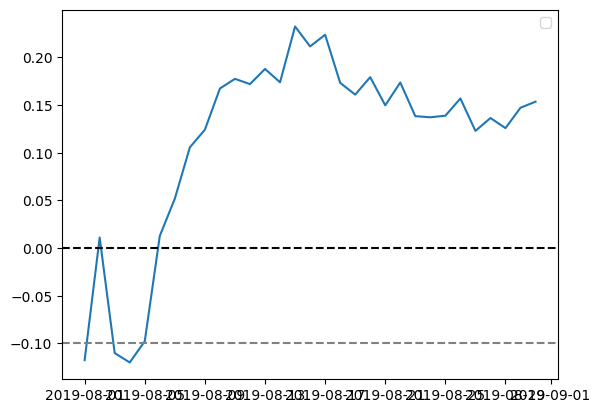

In [37]:
# Graph for relative diffrence cummulative conversion
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')



#### Note Graph relative difference for cummulative conversion
Cummulative conversion going up in testing period, around 0,15 to 0,20 starting at the middle of testing period.


### Order Size

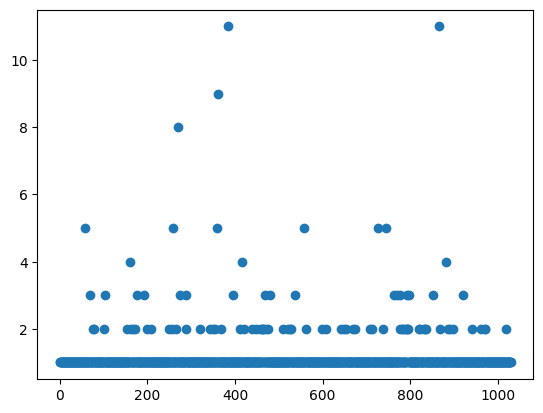

In [38]:
#scatter chart order size
ordersByUsers = (
 df_orders.drop(['group', 'revenue', 'date'], axis=1)
 .groupby('visitorId', as_index=False)
 .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

# spread value from 0 to observation value di ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

In [39]:
# percentile 95 and 99 for customer order qty
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Note scatter chart for order size
There is only 5% customer order 2 and only 1% who is order 4. There are some outlier found.


### Order Value

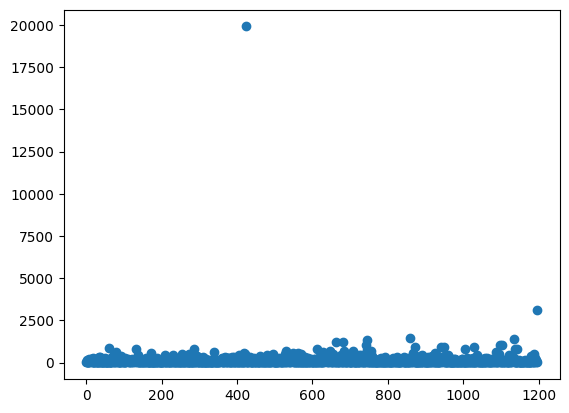

In [40]:
# scatter chart for order price
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])


In [41]:
# percentile for Order price
print(np.percentile(df_orders['revenue'], [95, 99]))

[435.54  900.904]


#### Note Order Value
5% customer order value 435,54 and only 1% customer order value 900, 904
There is some outlier of order value above 2500.


### A/B Testing Using raw data

In [42]:
# data preparation
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId',
as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId',
as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersA.sample(6)

,userId,orders
386,3972127743,1
296,3237158392,1
338,3607649875,1
128,2067508917,1
96,182753106,1
284,3161387566,1


In [43]:
#sample A and sample B by order

sampleA = pd.concat(
 [
 ordersByUsersA['orders'],
 pd.Series(
 0, index=np.arange(
 df_visits[df_visits['group']=='A']['visits'].sum() -
len(ordersByUsersA['orders'])), name='orders')],axis=0)


sampleB = pd.concat(
 [
 ordersByUsersB['orders'],
 pd.Series(
 0, index=np.arange(
 df_visits[df_visits['group']=='B']['visits'].sum() -
len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [44]:
#calculate statistic signifance conversion difference between group using
# mannwhitneyu test for 2 sample
print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01236
0.153


In [45]:
# Size difference
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']
                ['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(df_orders[df_orders['group']=='B']
                ['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))


0.681
0.228


#### Note Raw data

Difference between conversion by group and difference of average order size by group:

1. Difference conversion by group
p = 0,01679 less than 0,05 means hipotesis 0 can be rejected, because there is difference between group.
The difference between conversion from sample Group A and Sample Group B = 0.138

2. Difference Order size between groups
p = 0.692 > 0,05 which means hypothesis 0 can not be rejected, cause there is difference between group.
The difference between conversion from sample group A and sample Group B = 0,252


anomali test needed.


### A/B Testing using filtered data

In [46]:
usersWithManyOrders = pd.concat(
 [
 ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
 ],
 axis=0,
)

abnormalUsers = (usersWithManyOrders).drop_duplicates().sort_values()

print(abnormalUsers)

31     1230306981
54     1404934699
78     1614305549
99     1668030113
119     199603092
122    2038680547
132    2108163459
167     237748145
205    2378935119
220    2458001652
227     249864742
242    2587333274
267    2742574263
229    2780786433
255    2988190573
313    3062433592
398    3717692402
411    3803269165
371    3891541246
373    3908431265
385    3967698036
475    4186807279
419    4256040402
495     457167155
440     611059232
Name: userId, dtype: object


In [47]:
# Data terfilter hitung signifikansi statitik dari perbedaan tingkat konversinya
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.
                arange(df_visits[df_visits['group']=='A']['visits'].sum() -
                len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.
                arange(df_visits[df_visits['group']=='B']['visits'].sum() -
                len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.01106
0.171


In [48]:
# Data terfilter perbedaan ukuran pesanan rata rata
print(
 "{0:.3f}".format(
 stats.mannwhitneyu(
 df_orders[
 np.logical_and(
 df_orders['group'] == 'A',
 np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
 )
 ]['revenue'],
 df_orders[
 np.logical_and(
 df_orders['group'] == 'B',
 np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
 )
 ]['revenue'],
 )[1]
 )
)

print(
 "{0:.3f}".format(
 df_orders[
 np.logical_and(
 df_orders['group'] == 'B',
 np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
 )
 ]['revenue'].mean()
 / df_orders[
 np.logical_and(
 df_orders['group'] == 'A',
 np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
 )
 ]['revenue'].mean()
 - 1
 )
)


0.637
0.219


#### Note using filtered data
1. Conversion difference by group
p = 0.01155 < 0,05  means can reject Hipotesis = 0, which means there are difference between conversion level of the two groups.
Difference of conversion level of 2 groups = 0,170

2. Average Order size difference between 2 groups
p = 0.706 > 0,05 means can not reject hipotesis = 0, which means there is no significant diffrence between two groups.
Difference of average Order sizebetween 2 groups = 0,228




## Conculusion

A big online store assigned data analyst and marketing team to analyzed datato help improving company income.

The tasks including:

Prioritize hypothesis test based on ICE and RICE framework
Run A/B Testing and analyzed the result

There 3(three) data avaialble:
Hypotheses : List of hypothesis test
Orders : List of orders
Visits : List of visits

During Data preparation, it is found there is no missing data, but it is found case where a visitor can belong to two group "A" and "B"
for this case when it is found one visitor has 2 groups, that visitor will put only in one group which most found in his data.

Hypothesis Priority base on ICE and RICE framework:
                                            ICE   RICE
Launch a promotion that gives user discount 1      5
Add two new channels for attrack traffic    2      3
Add a subscription form to all main pages   3      1
Show banners with current offers sales      4      4
Add product recommendation blocks to store  5      2

TOP 5 hypothesis for improving company income both from ICE or RICE framework  are same only the sequence are different because of REACH factors from RICE framework.

The 1st rank from RICE framework is "Add Subscription form to all main pages"  where Reach factor is 10 the highest rank.

The 2nd rank from RICE framework is "Add product recommendation block to the store" which have reach factor = 8

3rd rank for REACH is  "Add two new channels for attracting traffic' has impact and confidence = 9 although reach factor only 3.

the 1st rank in ICE framework is "Launch promotion that give user discounts" has impact and confidence factor = 9, although reach only 1

its is clearly shown that "Reach", "Impact" and "Confidence" factors highly impact hypothesis priority.

Fluctuation of cummulative conversion for group A quite significant. At the beginning of the testing period, average order size groing up significantly, then groing down until the end.

for group B at the beginning it go down, later it going up and stable until end of testing period.

At the end of testing period, Group B higher than Group A. This is allign with testing with "Raw Data" and "Filtered Data" which show the cummulative conversion Group B > Group A.

Cummulative conversion going up during testing period, around 0,15 to 0,20 from middle to end of testing period.

Average customer order size:
Only 5% visitor order 2, and only 1% order 4 . but it still found some outlier order quantity.
Average visitor order value :
5% visitor has order 435,54 , and only 1% visitor order 900,904 . There is outlier with order value above 2500

Test was done with "Raw data" dan "Filtered data" for 2 things:
1. Order Cummulative conversion
2. Average Order size

The result as describe below:
1. Cummulative conversion
    Raw Data: p=0,01679 , "Filtered data": p = 0,01155
    Difference Cummulative conversion with Raw data : 0,138
    Difference Cummulative conversion with Filetred data  0,170
    
    This show Group A cummulative conversion different from cummulative conversion Group B. Group B outperform group A
        
2. Average order size
    Raw Data: p=0,692 , "Filtered Data": p = 0,706
    Difference Average Order Size with Raw Data : 0,252
    Difference Average Order Size with Filtered Data  0,228

    This show there is significant different between average order size in Group A and Group B. Group B outperform Group A.
    
Available data show Group B outperform Group A. Both in Cummulative conversion  and Average Order Size. It is suggested to stop the testing and decide Group B as a leading Group.
